# Library

In [21]:
import numpy as np
import pandas as pd
from scipy.stats import norm

In [4]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import statistic
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [15]:
df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/Modal_Antar.csv")

In [16]:
df

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1


In [14]:
 # Load dataset
df_time = pd.read_csv(f'E:\gitlab\machine-learning\dataset\RestaurantVisitors.csv',index_col='date',parse_dates=True)
df_time.index.freq = 'D'

In [17]:
 df_time = df_time.dropna()

In [18]:
df_time

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0


# Statistic test

In [8]:
statistic.stat_test(df['usia'],types="normality")

shapiro test

stat=0.974, p=0.011
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: the sample does not have a Gaussian distribution


D'Agostino's K^2 Normality Test

stat=5.970, p=0.051
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: the sample has a Gaussian distribution


Anderson-Darling Test

stat=0.971
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level




,name,stat_value,p_value,result
0,shapiro test,0.973563,0.010727,H1: the sample does not have a Gaussian distri...
1,D'Agostino's K^2 Normality Test,5.969807,0.050544,H0: the sample has a Gaussian distribution
2,Anderson-Darling Test,0.971481,0.010000,Probably Gaussian at the 1.0% level


In [12]:
statistic.stat_test(df['usia'],df['kat_status'],types="correlation")

Correlation Tests

Pearsonr Correlation test

stat=0.032, p=0.713
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: the two samples are independent


Spearman's Rank Correlation Test

stat=0.029, p=0.737
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: the two samples are independent


Kendall's Rank Correlation Test

stat=0.029, p=0.737
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: the two samples are independent


Chi-Squared Test

stat=14.694, p=1.000
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: the two samples are independent




,name,stat_value,p_value,result
0,Pearsonr Correlation test,0.032227,0.712688,H0: the two samples are independent
1,Spearman's Rank Correlation Test,0.029418,0.736765,H0: the two samples are independent
2,Kendall's Rank Correlation Test,0.029418,0.736765,H0: the two samples are independent
3,Chi-Squared Test,14.694383,1.000000,H0: the two samples are independent


In [20]:
statistic.stat_test(df_time['total'],types="stationary")

Stationary Tests

Augmented Dickey-Fuller Unit Root test

stat=-5.592, p=0.000
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: a unit root is not present (series is stationary)


Kwiatkowski-Phillips-Schmidt-Shin Test

stat=0.202, p=0.100
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H0: the time series is not trend-stationary




,name,stat_value,p_value,result
0,Augmented Dickey-Fuller Unit Root test,-5.592497,0.000001,H1: a unit root is not present (series is stat...
1,Kwiatkowski-Phillips-Schmidt-Shin Test,0.202363,0.100000,H0: the time series is not trend-stationary


In [26]:
statistic.stat_test(df['usia'],df['pendapatan'],types="p_hypothesis")

Parametric Statistical Hypothesis Tests

Student's t-test

stat=-16.404, p=0.000
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: the means of the samples are unequal


Paired Student's t-test

stat=-16.404, p=0.000
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: the means of the samples are unequal


Analysis of Variance Test (ANOVA)

stat=269.090, p=0.000
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: the means of the samples are unequal




,name,stat_value,p_value,result
0,Student's t-test,-16.403967,3.561431e-42,H1: the means of the samples are unequal
1,Paired Student's t-test,-16.403969,1.174441e-33,H1: the means of the samples are unequal
2,Analysis of Variance Test (ANOVA),269.090130,3.561431e-42,H1: the means of the samples are unequal


In [27]:
statistic.stat_test(df['usia'],df['pendapatan'],types="nonp_hypothesis")

Nonparametric Statistical Hypothesis Tests

Mann-Whitney U Test

stat=0.000, p=0.000
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: the distributions of both samples are not equal


Wilcoxon Signed-Rank Test

stat=0.000, p=0.000
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: the distributions of both samples are not equal


Kruskal-Wallis H Test

stat=198.876, p=0.000
Strong evidence against the null hypothesis
Reject the null hypothesis
H1: the distributions of one or more samples are not equal




,name,stat_value,p_value,result
0,Mann-Whitney U Test,0.000000,1.857960e-45,H1: the distributions of both samples are not ...
1,Wilcoxon Signed-Rank Test,0.000000,1.429496e-23,H1: the distributions of both samples are not ...
2,Kruskal-Wallis H Test,198.875806,3.674172e-45,H1: the distributions of one or more samples a...


# AB testing

A/B testing is one of the most popular controlled experiments used to optimize web marketing strategies. It allows decision makers to choose the best design for a website by looking at the analytics results obtained with two possible alternatives A and B.

# Statistical significance

Our null hypothesis H0 is that the two designs A and B have the same efficacy

The statistical significance is then measured by the p-value, i.e. the probability of observing a discrepancy between our samples at least as strong as the one that we actually observed.

A two-tailed test is preferable in our case, since we have no reason to know a priori whether the discrepancy between the results of A and B will be in favor of A or B. This means that we consider the alternative hypothesis Ha the hypothesis that A and B have different efficacy.

The p-value is therefore computed as the area under the the two tails of the probability density function p(x) of a chosen test statistic on all x’ s.t. p(x’) <= p(our observation). The computation of such p-value clearly depends on the data distribution. So we will first see how to compute it for discrete metrics, and then for continuous metrics.

## Discrete

In [5]:
np.random.seed(42)

x = np.random.binomial(n=1, p=0.6, size=15)
y = np.random.binomial(n=1, p=0.4, size=19)

_, (a, c) = np.unique(x, return_counts=True)
_, (b, d) = np.unique(y, return_counts=True)

df = pd.DataFrame(data=[[a, b], [c, d]], 
                 index=["click", "no click"], 
                 columns=["A", "B"])
m = df.values

print("- Observations:")
print(f"  - Version A: = {x}")
print(f"  - Version B: = {y}")
print("")
print("- Contingency table:")
display(df)

- Observations:
  - Version A: = [1 0 0 1 1 1 1 0 0 0 1 0 0 1 1]
  - Version B: = [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1]

- Contingency table:


,A,B
click,7,15
no click,8,4


Contingency table


,data_1,data_2
click,7,15
no click,8,4


Fisher's exact test
- Fisher's exact test: p-val = 7.5%
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H1: the two designs have difference efficacy


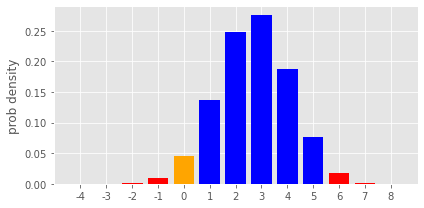

Pearson's chi-squared test
- Pearson's chi-squared t-test:
   - χ2 value: 3.825
   - p-value: 5.1%
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H1: the two designs have difference efficacy


,name,stat_value,p_value,result
0,Fisher's exact test,4.000000,0.075162,H1: the two designs have difference efficacy
1,Pearson's chi-squared test,3.824774,0.050500,H1: the two designs have difference efficacy


In [18]:
statistic.stat_test(x,y,types="ab_test",labels=["click", "no click"],type_ab='discrete')

# continum

In [24]:
np.random.seed(42)

n_x, n_y = 17, 14

d1 = norm(loc=200, scale=100)
d2 = norm(loc=280, scale=90)

disc = 50
x = (d1.rvs(size=n_x) / disc).astype(int) * disc
y = (d2.rvs(size=n_y) / disc).astype(int) * disc

- Distribution plot:


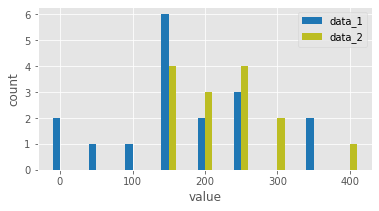

Z-test:
   - z value: -1.910
   - p-value: 5.6%
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H1: the two models have difference efficacy


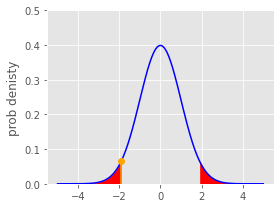

Student's t-test:
   - nu: 29.000
   - t value: -1.789
   - p-value: 8.4%
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H1: the two models have difference efficacy


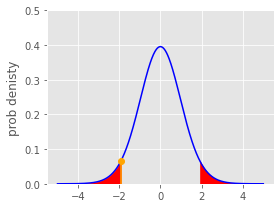

Welch' t-test:
   - nu: 28.505
   - t value: -1.848
   - p-value: 7.5%
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H1: the two models have difference efficacy


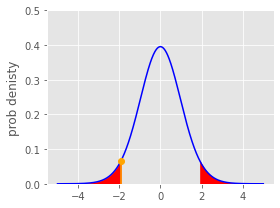

Mann-Whitney U test:
   - U value: 76.000
   - p-value: 8.0%
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
H1: the two models have difference efficacy


,name,stat_value,p_value,result
0,Z test,-1.909776,0.056162,H1: the two models have difference efficacy
1,Student's t-test,-1.789063,0.084055,H1: the two models have difference efficacy
2,Welch' t-test,-1.848000,0.075003,H1: the two models have difference efficacy
3,Mann-Whitney U test,76.000000,0.080041,H1: the two models have difference efficacy


In [26]:
statistic.stat_test(x,y,types="ab_test",labels=["click", "no click"],type_ab='continuous')